# Proyecto Sprint 9.
## Paso 1. Acceda los datos y prepáralos para el análisis
Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto. 
Rutas de archivos: 

/datasets/visits_log_us.csv Acceda el dataset
/datasets/orders_log_us.csv Acceda el dataset
/datasets/costs_us.csv Acceda el dataset

### Inicializacion.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Cargar los datos.

In [2]:
visits = pd.read_csv("/datasets/visits_log_us.csv")
orders = pd.read_csv("/datasets/orders_log_us.csv")
costs = pd.read_csv("/datasets/costs_us.csv")

### Preparar los datos del df de visits.

In [3]:
print(visits.head())
print(" ")
print(visits.info())
print(" ")
print(visits.describe())
print(" ")
print(visits.duplicated().sum())

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usa

Una vez vistos los datos correspondientes a "visits", podemos ver que los tipos de datos de cuatro de las cinco columnas son incorrectos, esto debido a que, en la columna "Device" el tipo de datos que tiene es el de "object" pero esta columna deberia de tener el tipo de dato de "category", esto debido a que en la muestra inicial solo muestra dos diferentes tipos de dispositivos, luego en segundo lugar tenemos la columna "End Ts" que de nuevo esta en tipo de datos "object" cuando deberia de tener el tipo de datos de "datetime", tal y como sucede con la columna "Start Ts", por ultimo, en el caso de la columna "Source Id" deberia de tener un tipo de datos "uint64" como pasa en el caso de la columna "Uid", esto debido a que es un numero id que sirve para identificar simplemente.

Del mismo modo podemos ver que no hay duplicados.

In [4]:
visits['Device'] = visits["Device"].astype('category')
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M:%S")
visits['Source Id'] = visits['Source Id'].astype('uint64')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M:%S")
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  uint64        
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), uint64(2)
memory usage: 11.3 MB
None


### Preparar los datos del df de orders.

In [5]:
print(orders.head())
print(" ")
print(orders.info())
print(" ")
print(orders.describe())
print(" ")
print(orders.duplicated().sum())

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
 
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19


Una vez vistos los datos correspondientes a "order", podemos ver que los tipos de datos de la columna "Buy Ts" estan con un tipo de datos "object" cuando deberia de tener el tipo de datos de "datetime".

Gracias al metodo describe podemos ver que la ganancia promedio es de 4.999647, que la ganancia minima es de 0 y la maxima es de 2633.28 y que hay una desviacion estandar de 21.818359.

Del mismo modo podemos ver que no hay duplicados.

In [6]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M:%S")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### Preparar los datos del df de costs.

In [7]:
print(costs.head())
print(" ")
print(costs.info())
print(" ")
print(costs.describe())
print(" ")
print(costs.duplicated().sum())

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
 
         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000
 
0


Una vez vistos los datos correspondientes a "costs", podemos ver que los tipos de datos de dos de las tres columnas son incorrectos, esto debido a que, en la columna "source_id" el tipo de datos que tiene es el de "int64" pero esta columna deberia de tener el tipo de dato de "uint64", esto debido a que es un numero id que sirve para identificar simplemente, luego en segundo lugar tenemos la columna "dt" que tiene el tipo de datos "object" cuando deberia de tener el tipo de datos de "datetime". 

Gracias al metodo describe podemos ver que el costo promedio es de 129.477427, que el costo minimo es de 0.54 y el maximo es de 1788.28, asi como tambien podemos ver que hay una desviacion estandar de 156.296628.

Del mismo modo podemos ver que no hay duplicados.

In [8]:
costs['source_id'] = costs['source_id'].astype('uint64')
costs['dt'] = pd.to_datetime(costs['dt'], format = "%Y-%m-%d")
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   uint64        
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 59.7 KB


## Paso 2. Haz informes y calcula métricas 

### Visitas:

¿Cuántas personas lo usan cada día, semana y mes?

In [9]:
visits['session_date'] = visits['Start Ts'].dt.date
day_total = visits.groupby('session_date').agg({'Uid': 'nunique'})
print(day_total.head())
visits['session_week'] = visits['Start Ts'].dt.week
week_total = visits.groupby('session_week').agg({'Uid': 'nunique'})
print(week_total.head())
visits['session_month'] = visits['Start Ts'].dt.month
month_total = visits.groupby('session_month').agg({'Uid': 'nunique'})
print(month_total.head())

              Uid
session_date     
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
               Uid
session_week      
1             6918
2             6703
3             6972
4             7060
5             8111
                 Uid
session_month       
1              28716
2              28749
3              27473
4              21008
5              20701


Con base en la respuesta a la pregunta anterior podemos ver como se responde con por ejemplo en el dia 1 hubo 605 usuarios, en el mes 2 hubo 608 usuarios por ejemplo, en la semana numero 1 hubo 6918 usuarios, en la semana 2 hubo 6703 usuarios por ejemplo, asi como tambien en el mes 1 hubo 28716 usuarios, en el mes 2 hubo 28749 por ejemplo.

¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [10]:
daily_sessions = visits.groupby('session_date').size()
print(daily_sessions.head())

session_date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
dtype: int64


Con base en la respuesta a la pregunta anterior podemos ver como se responde con la totalidad de sesiones que tiene la pagina por dia, como sucede en el 01 del 06 de 2017 en donde hubo 664 visitas, y en el dia siguiente hubo 658 visitas por ejemplo.

¿Cuál es la duración de cada sesión?

In [11]:
visits['session_duration'] = visits['End Ts'] - visits['Start Ts']
visits['Session Duration (minutes)'] = visits['session_duration'].dt.total_seconds() / 60
print(visits['session_duration'].head())

0   0 days 00:18:00
1   0 days 00:28:00
2   0 days 00:00:00
3   0 days 00:24:00
4   0 days 00:00:00
Name: session_duration, dtype: timedelta64[ns]


¿Con qué frecuencia los usuarios regresan?

cohort_age   0         1         2         3         4         5         6   \
cohort                                                                        
2017-06     1.0  0.078664  0.053775  0.061392  0.068557  0.071423  0.061015   
2017-07     1.0  0.056088  0.051294  0.056164  0.058219  0.048174  0.045358   
2017-08     1.0  0.076908  0.062862  0.062764  0.050093  0.044004  0.036342   
2017-09     1.0  0.085489  0.069205  0.050706  0.039392  0.037835  0.035860   
2017-10     1.0  0.078608  0.052239  0.038958  0.034261  0.032221  0.021365   
2017-11     1.0  0.078281  0.044113  0.038682  0.033727  0.023415  0.021800   
2017-12     1.0  0.055802  0.037993  0.031107  0.020263  0.019036       NaN   
2018-01     1.0  0.059715  0.039339  0.024973  0.020244       NaN       NaN   
2018-02     1.0  0.057080  0.025454  0.020093       NaN       NaN       NaN   
2018-03     1.0  0.041818  0.027053       NaN       NaN       NaN       NaN   
2018-04     1.0  0.048380       NaN       NaN       

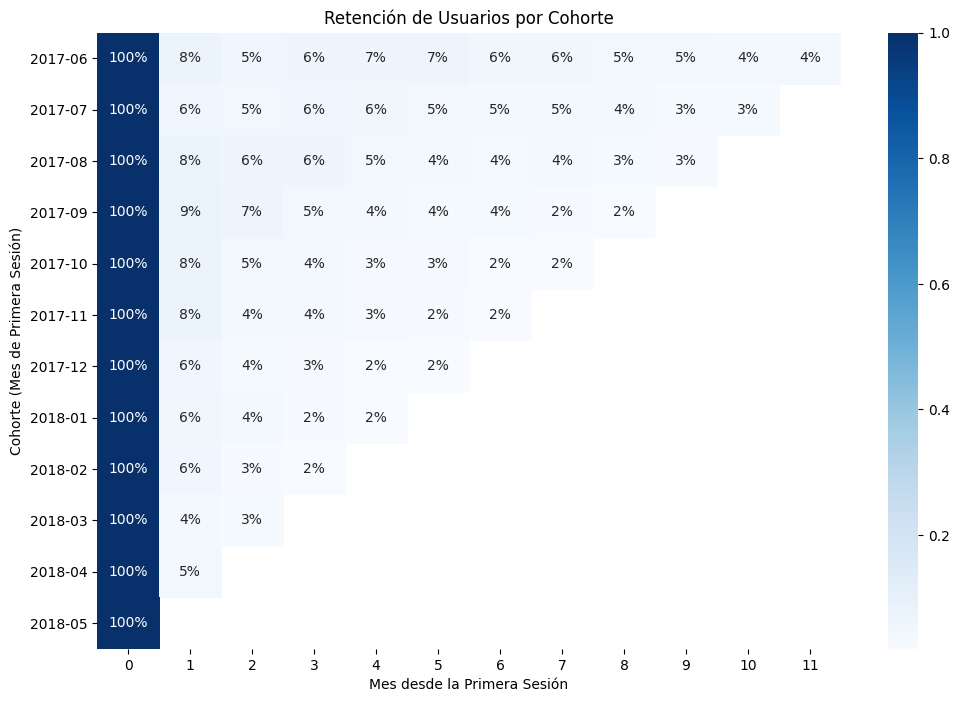

In [12]:
# Convertir la columna 'Start Ts' a datetime si no está en ese formato.
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

# Crear la cohorte basada en el primer mes de cada usuario.
visits['cohort'] = visits.groupby('Uid')['Start Ts'].transform('min').dt.to_period('M')

# Crear la columna de mes en el que ocurrió la sesión.
visits['session_month'] = visits['Start Ts'].dt.to_period('M')

# Agrupar por cohorte y mes de sesión para contar los usuarios únicos.
cohort_data = visits.groupby(['cohort', 'session_month']).agg({'Uid': 'nunique'}).reset_index()
cohort_data = cohort_data.rename(columns={'Uid': 'user_count'})

# Calcular la edad de la cohorte en meses.
cohort_data['cohort_age'] = (cohort_data['session_month'] - cohort_data['cohort']).apply(lambda x: x.n)

# Crear una tabla pivote para visualizar la retención.
retention_pivot = cohort_data.pivot_table(index='cohort', columns='cohort_age', values='user_count')
retention_pivot = retention_pivot.divide(retention_pivot.iloc[:,0], axis=0)  # Dividir por el número de usuarios iniciales para calcular la tasa de retención
print(retention_pivot)
 
# Visualizacion con una tabla de calor.
plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot, annot=True, fmt='.0%', cmap='Blues')
plt.title('Retención de Usuarios por Cohorte')
plt.ylabel('Cohorte (Mes de Primera Sesión)')
plt.xlabel('Mes desde la Primera Sesión')
plt.show()

### Ventas:

¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

     cohort  days_to_conversion
0   2017-06           46.409853
1   2017-07           40.220098
2   2017-08           33.194073
3   2017-09           24.737083
4   2017-10           16.851005
5   2017-11           15.463163
6   2017-12           10.636721
7   2018-01            8.211286
8   2018-02            5.199309
9   2018-03            2.937984
10  2018-04            2.083598
11  2018-05            0.525043


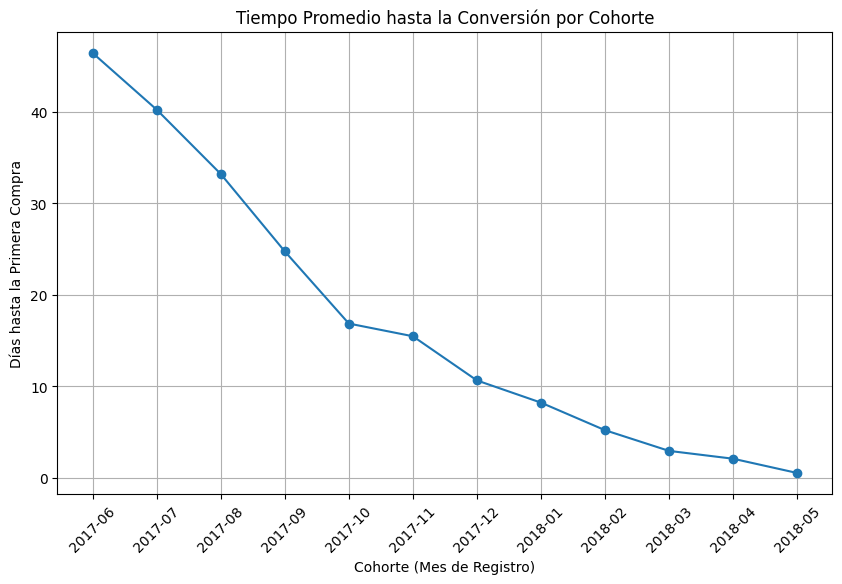

In [13]:
# Obtener la primera visita (registro) de cada usuario.
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index(name = 'first_visit')

# Obtener la primera compra de cada usuario.
first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index(name = 'first_order')

# Unir la primera visita con la primera compra de cada usuario.
conversion_data = pd.merge(first_visit, first_order, on='Uid', how='inner')

# Calcular el número de días entre el registro y la primera compra.
conversion_data['days_to_conversion'] = (conversion_data['first_order'] - conversion_data['first_visit']).dt.days

# Crear una cohorte basada en el mes de la primera visita.
conversion_data['cohort'] = conversion_data['first_visit'].dt.to_period('M')

# Calcular el tiempo promedio de conversión por cohorte.
cohort_conversion = conversion_data.groupby('cohort')['days_to_conversion'].mean().reset_index()
print(cohort_conversion)

# Visualización del tiempo promedio de conversión por cohorte.
plt.figure(figsize=(10, 6))
plt.plot(cohort_conversion['cohort'].astype(str), cohort_conversion['days_to_conversion'], marker='o')
plt.xlabel('Cohorte (Mes de Registro)')
plt.ylabel('Días hasta la Primera Compra')
plt.title('Tiempo Promedio hasta la Conversión por Cohorte')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


¿Cuántos pedidos hacen durante un período de tiempo dado?

     Buy Ts  order_count
0   2017-06         2354
1   2017-07         2363
2   2017-08         1807
3   2017-09         3387
4   2017-10         5679
5   2017-11         5659
6   2017-12         6218
7   2018-01         4721
8   2018-02         5281
9   2018-03         5326
10  2018-04         3273
11  2018-05         4346
12  2018-06            1


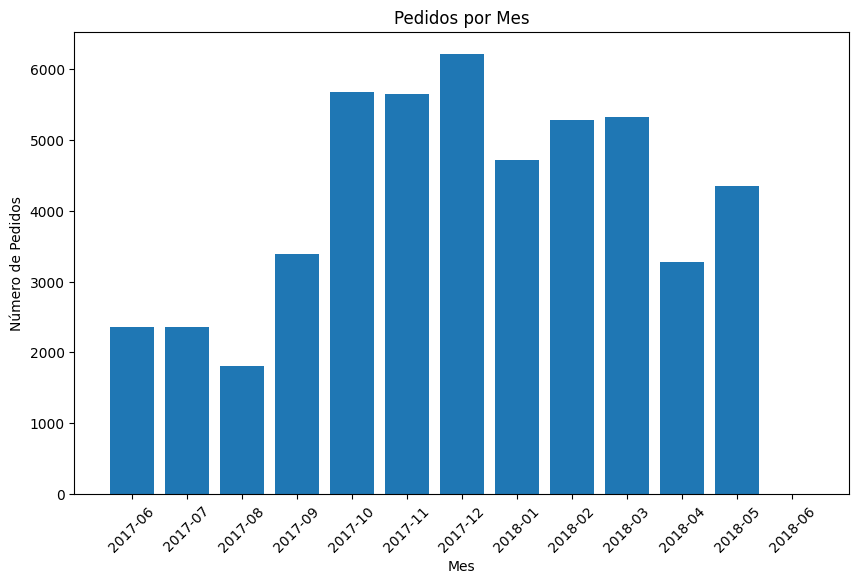

In [14]:
orders_per_month = orders.groupby(orders['Buy Ts'].dt.to_period('M'))['Uid'].count().reset_index(name='order_count')
print(orders_per_month)

plt.figure(figsize=(10, 6))
plt.bar(orders_per_month['Buy Ts'].astype(str), orders_per_month['order_count'])
plt.xlabel('Mes')
plt.ylabel('Número de Pedidos')
plt.title('Pedidos por Mes')
plt.xticks(rotation=45)
plt.show()

¿Cuál es el tamaño promedio de compra?

In [15]:
# Calcular el total de ingresos y el número de pedidos.
total_revenue = orders['Revenue'].sum()
total_orders = orders['Uid'].count()

# Calcular el tamaño promedio de compra.
average_order_value = total_revenue / total_orders
print(f"El tamaño promedio de compra es: ${average_order_value:.2f}")

orders['order_month'] = orders['Buy Ts'].dt.to_period('M')
average_order_value_per_month = orders.groupby('order_month').agg({'Revenue': 'mean'}).reset_index()
print(average_order_value_per_month)

El tamaño promedio de compra es: $5.00
   order_month   Revenue
0      2017-06  4.060106
1      2017-07  5.306589
2      2017-08  4.847139
3      2017-09  5.416448
4      2017-10  4.928280
5      2017-11  4.783518
6      2017-12  5.852139
7      2018-01  4.112927
8      2018-02  4.840095
9      2018-03  5.413930
10     2018-04  5.150645
11     2018-05  4.771279
12     2018-06  3.420000


¿Cuánto dinero traen? (LTV)

In [16]:
# Sumar los ingresos totales por cliente.
customer_revenue = orders.groupby('Uid')['Revenue'].sum().reset_index(name='total_revenue')

# Obtener la primera y última compra para cada cliente.
first_purchase = orders.groupby('Uid')['Buy Ts'].min().reset_index(name='first_purchase')
last_purchase = orders.groupby('Uid')['Buy Ts'].max().reset_index(name='last_purchase')

# Calcular la duración de vida del cliente en días.
customer_lifetime = pd.merge(first_purchase, last_purchase, on='Uid')
customer_lifetime['customer_lifetime_days'] = (customer_lifetime['last_purchase'] - customer_lifetime['first_purchase']).dt.days

# Unir los ingresos totales con la vida útil del cliente.
customer_ltv = pd.merge(customer_revenue, customer_lifetime, on='Uid')

# Calcular el LTV.
customer_ltv['LTV'] = customer_ltv['total_revenue']  

# Calcular el LTV promedio.
average_ltv = customer_ltv['LTV'].mean()
print(f"El Valor del Tiempo de Vida (LTV) promedio es: ${average_ltv:.2f}")

El Valor del Tiempo de Vida (LTV) promedio es: $6.90


### Marketing:

¿Cuánto dinero se gastó?  (Total) 

In [17]:
total_cost = costs['costs'].sum()
print(f"Gasto total: ${total_cost:.2f}")

Gasto total: $329131.62


¿Cuánto dinero se gastó?  (Por fuente de adquisición) 

   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


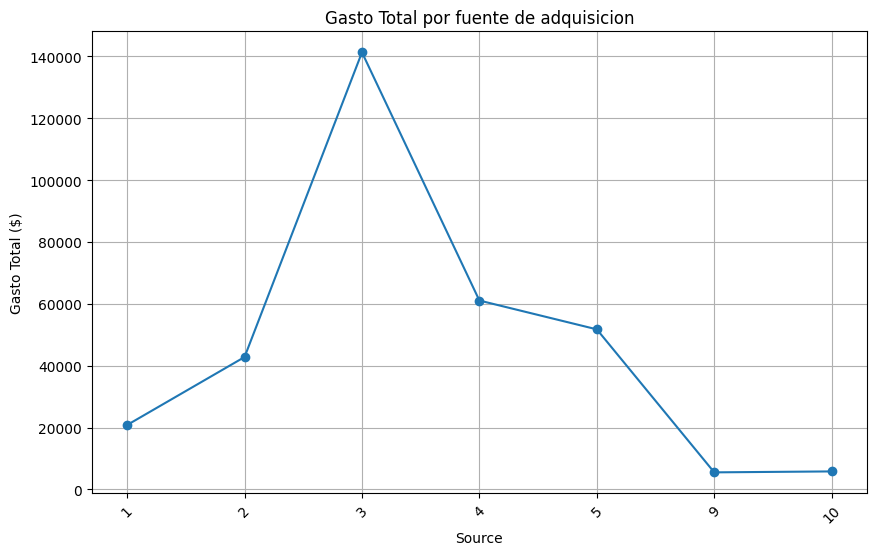

In [18]:
spend_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
print(spend_by_source)

# Visualización del gasto por fuente de adquisicion.
plt.figure(figsize=(10, 6))
plt.plot(spend_by_source['source_id'].astype(str), spend_by_source['costs'], marker='o')
plt.xlabel('Source')
plt.ylabel('Gasto Total ($)')
plt.title('Gasto Total por fuente de adquisicion')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

¿Cuánto dinero se gastó?  (A lo largo del tiempo) 

      month     costs
0   2017-06  18015.00
1   2017-07  18240.59
2   2017-08  14790.54
3   2017-09  24368.91
4   2017-10  36322.88
5   2017-11  37907.88
6   2017-12  38315.35
7   2018-01  33518.52
8   2018-02  32723.03
9   2018-03  30415.27
10  2018-04  22289.38
11  2018-05  22224.27


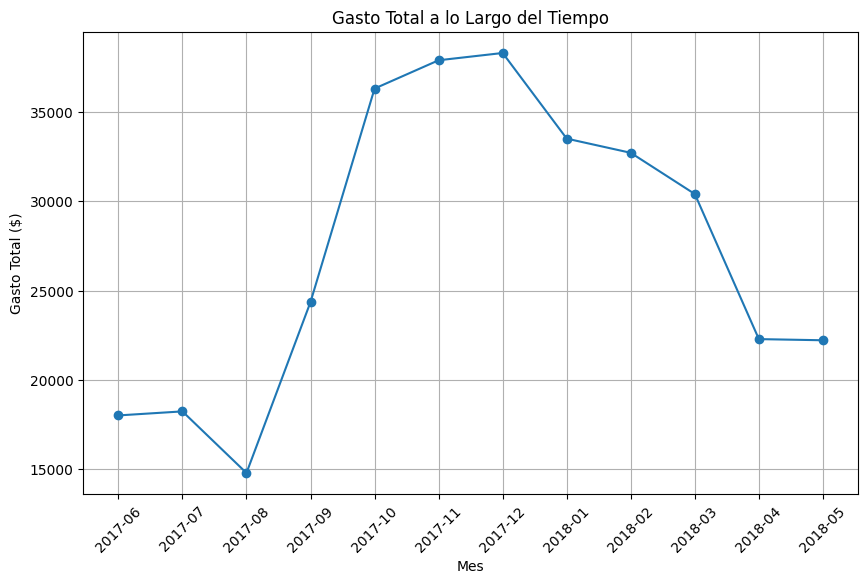

In [19]:
costs['month'] = costs['dt'].dt.to_period('M')
spend_by_month = costs.groupby('month')['costs'].sum().reset_index()
print(spend_by_month)

# Visualización del gasto por mes.
plt.figure(figsize=(10, 6))
plt.plot(spend_by_month['month'].astype(str), spend_by_month['costs'], marker='o')
plt.xlabel('Mes')
plt.ylabel('Gasto Total ($)')
plt.title('Gasto Total a lo Largo del Tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

   source_id        CAC
0          1   2.918642
1          2   5.859828
2          3  10.206676
3          4   4.284965
4          5   5.096209
5          9   1.975471
6         10   3.283976


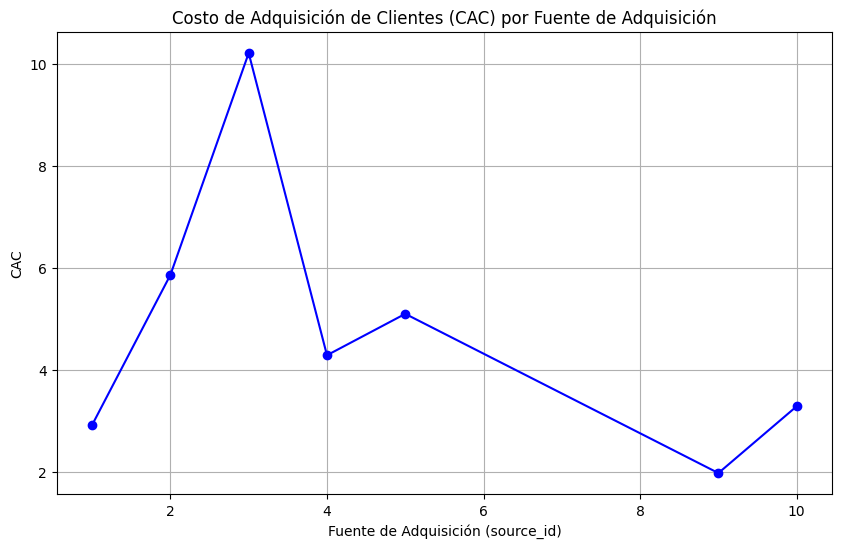

In [20]:
# Unir los DataFrames visits y orders por Uid.
clients = pd.merge(visits, orders, on='Uid', how='inner')
clients = clients[['Uid', 'Source Id', 'Buy Ts', 'Revenue']]

# Calcular el número de clientes únicos por fuente de adquisición.
customers_per_source = clients.groupby('Source Id')['Uid'].nunique().reset_index(name='total_customers')

# Agrupar los costos por fuente de adquisición.
cost_per_source = costs.groupby('source_id')['costs'].sum().reset_index(name='total_cost')

# Unir los costos con el número de clientes por fuente de adquisición.
cac_per_source = pd.merge(cost_per_source, customers_per_source, left_on='source_id', right_on='Source Id')

# Calcular el CAC (Costo de Adquisición de Clientes).
cac_per_source['CAC'] = cac_per_source['total_cost'] / cac_per_source['total_customers']

# Ver el resultado final del CAC.
print(cac_per_source[['source_id', 'CAC']])

# Gráfico de líneas del CAC.
plt.figure(figsize=(10, 6))
plt.plot(cac_per_source['source_id'], cac_per_source['CAC'], marker='o', linestyle='-', color='b')
plt.title('Costo de Adquisición de Clientes (CAC) por Fuente de Adquisición')
plt.xlabel('Fuente de Adquisición (source_id)')
plt.ylabel('CAC')
plt.grid(True)
plt.show()

¿Cuán rentables eran las inversiones? (ROMI)

Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 

   source_id          ROMI
0          1  10931.394351
1          2   6063.123732
2          3    109.938111
3          4    713.264930
4          5   2182.734427
5          9    558.673600
6         10    151.082097


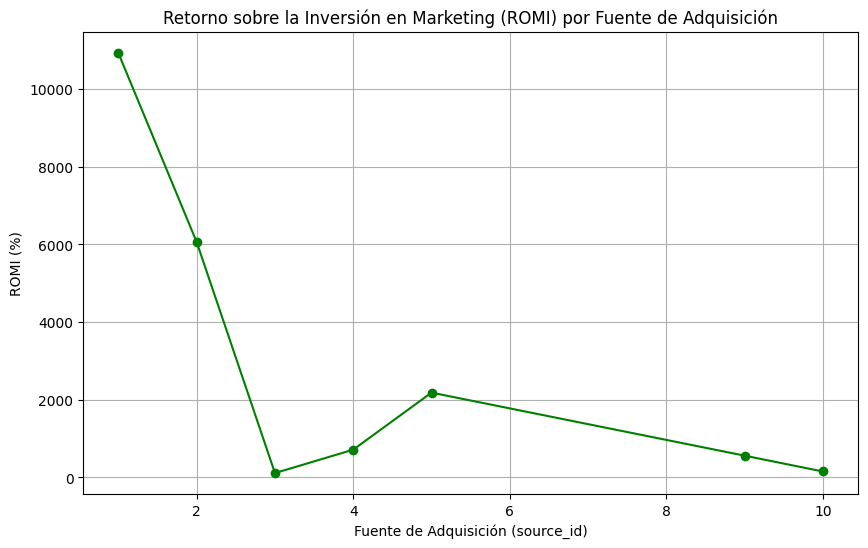

In [21]:
# Agrupar los ingresos por fuente de adquisición.
revenue_per_source = clients.groupby('Source Id')['Revenue'].sum().reset_index(name='total_revenue')

# Unir los ingresos con los costos por fuente de adquisición.
romi_per_source = pd.merge(revenue_per_source, cost_per_source, left_on='Source Id', right_on='source_id')

# Calcular el ROMI: (Ingresos - Costos) / Costos * 100.
romi_per_source['ROMI'] = (romi_per_source['total_revenue'] - romi_per_source['total_cost']) / romi_per_source['total_cost'] * 100

# Ver el resultado final del ROMI.
print(romi_per_source[['source_id', 'ROMI']])

# Gráfico de líneas del ROMI.
plt.figure(figsize=(10, 6))
plt.plot(romi_per_source['source_id'], romi_per_source['ROMI'], marker='o', linestyle='-', color='g')
plt.title('Retorno sobre la Inversión en Marketing (ROMI) por Fuente de Adquisición')
plt.xlabel('Fuente de Adquisición (source_id)')
plt.ylabel('ROMI (%)')
plt.grid(True)
plt.show()

## Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde.

¿Qué fuentes/plataformas recomendarías?

En el caso de inversion.

En este caso yo recomiendo las siguientes fuentes: la fuente numero 9 con un CAC de 1.975471, luego la fuente numero 1 con un CAC de 2.918642, posteriormente la fuente numero 10 con un CAC de 3.283976.

En el caso de rentabilidad.

Desde este otro punto de vista yo recomiendo la fuente numero 1 con un ROMI de 10931.394351%, luego la fuente numero 2 con un ROMI de 6063.123732%, por ultimo en tercer lugar yo recomiendo la fuente numero 5 con un ROMI de 2182.734427%.

Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

Me base en las metricas antes obtenidas, como lo son el CAC y el ROMI, esto debido a que son las metricas que mejor me ayudan a comprender el impacto de la inversion en marketing dentro de las diferentes fuentes.

Conclusión final: Dependiendo del objetivo de marketing, ya sea minimizar los costos o maximizar la rentabilidad, se puede adaptar la estrategia de inversión, sin embargo, si el objetivo es encontrar una mejor opcion con un menor costo, pero una mayor rentabilidad, la fuente indicada es la numero 1.